<a href="https://colab.research.google.com/github/Luckyaman/Fake-Base-Station/blob/main/Anomaly_Detection_in_Fake_base_station_Using_Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#Read the CSV file in a dataframe

df=pd.read_csv("/content/drive/MyDrive/UCCS New Research/Fake Base Station/Data/Fake_2nd_Batch_PCAP_logs_processed.csv")



In [ ]:
# Get the columns Name

col_name=df.columns

# Print the colums Name

print(col_name)

Index(['Timestamp', 'Timestamp (s)', 'File path', 'Sample number',
       'Packet number', 'Size (B)', 'Layers', 'Packet Information Summary',
       'Unnamed: 8'],
      dtype='object')


In [ ]:
# Viewing the first 20 lines
df.head(100)

,Timestamp,Timestamp (s),File path,Sample number,Packet number,Size (B),Layers,Packet Information Summary,Unnamed: 8
0,2024-06-16 20:09:06.980800,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,0,111,user_dlt udp mac-nr _ws.malformed,RRC Setup[Malformed Packet],NaN
1,2024-06-16 20:09:07.000050,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,1,41,user_dlt udp mac-nr,RAR (RA-RNTI=57) (RAPID=0 TA=4 Temp C-RNTI=179...,NaN
2,2024-06-16 20:09:07.001758,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,2,42,user_dlt udp mac-nr,RRC Setup Request (Short BSR LCG ID=0 BS=1) ...,NaN
3,2024-06-16 20:09:07.015084,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,3,356,user_dlt udp mac-nr,RRC Setup (Padding 2 bytes),NaN
4,2024-06-16 20:09:07.045923,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,4,559,user_dlt udp mac-nr,"RRC Setup Complete, Registration request [33-...",NaN
...,...,...,...,...,...,...,...,...,...
95,2024-06-16 20:09:11.485010,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,95,419,user_dlt udp mac-nr,"RRC Setup Complete, Registration request [33-...",NaN
96,2024-06-16 20:09:11.544509,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,96,544,user_dlt udp mac-nr,"RRC Setup Complete, Registration request [33-...",NaN
97,2024-06-16 20:09:11.604524,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,97,419,user_dlt udp mac-nr,"RRC Setup Complete, Registration request [33-...",NaN
98,2024-06-16 20:09:11.664992,1.718569e+09,./Fake_2nd_Batch_PCAP_logs/ue_mac_nr_1.pcap,1,98,544,user_dlt udp mac-nr,"RRC Setup Complete, Registration request [33-...",NaN


Number of anomalies detected: 23950


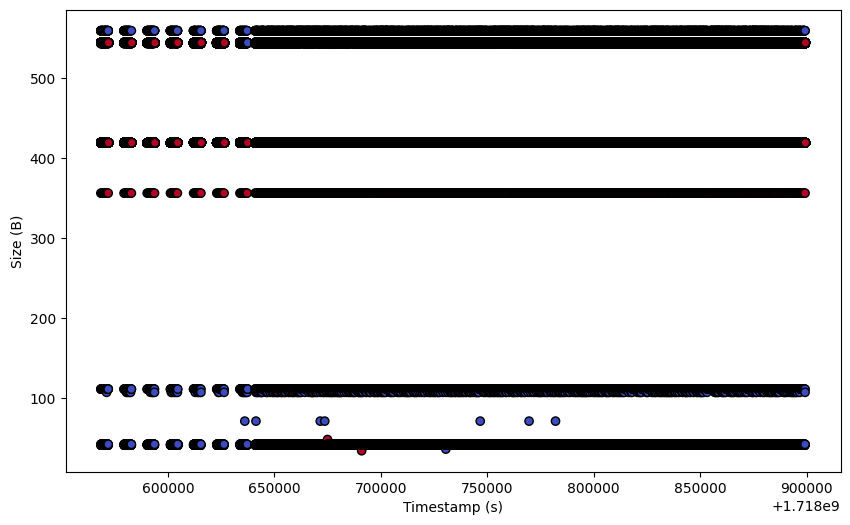

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the data
df = pd.read_csv('/content/drive/MyDrive/UCCS New Research/Fake Base Station/Data/Fake_2nd_Batch_PCAP_logs_processed.csv')

# Step 2: Preprocess the data
# Handle missing values
df.fillna(0, inplace=True)

# Convert categorical data to numerical, if necessary
# Encoding 'Packet Information Summary' and 'Layers' into numerical values
label_encoder = LabelEncoder()
df['Packet Information Summary'] = label_encoder.fit_transform(df['Packet Information Summary'].astype(str))
df['Layers'] = label_encoder.fit_transform(df['Layers'].astype(str))

# Feature engineering
# Example: Time difference between packets
df['Time Difference (s)'] = df['Timestamp (s)'].diff().fillna(0)

# Step 3: Select features for anomaly detection
features = [
    'Packet number',
    'Size (B)',
    'Layers',
    'Packet Information Summary',
    'Time Difference (s)'
]

X = df[features]

# Step 4: Train Isolation Forest for anomaly detection
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
df['Anomaly Score'] = isolation_forest.fit_predict(X)

# Anomalies are labeled as -1 by the Isolation Forest
df['Anomaly'] = df['Anomaly Score'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

# Step 5: Analyze and interpret the results
# Count the number of anomalies detected
anomalies = df[df['Anomaly'] == 'Anomaly']
print(f"Number of anomalies detected: {len(anomalies)}")

# Save anomalies for further inspection
anomalies.to_csv('detected_anomalies.csv', index=False)

# Optionally, visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['Timestamp (s)'], df['Size (B)'], c=df['Anomaly Score'], cmap='coolwarm', edgecolors='k')
#plt.title('Anomaly Detection in Network Traffic')
plt.xlabel('Timestamp (s)')
plt.ylabel('Size (B)')
plt.show()


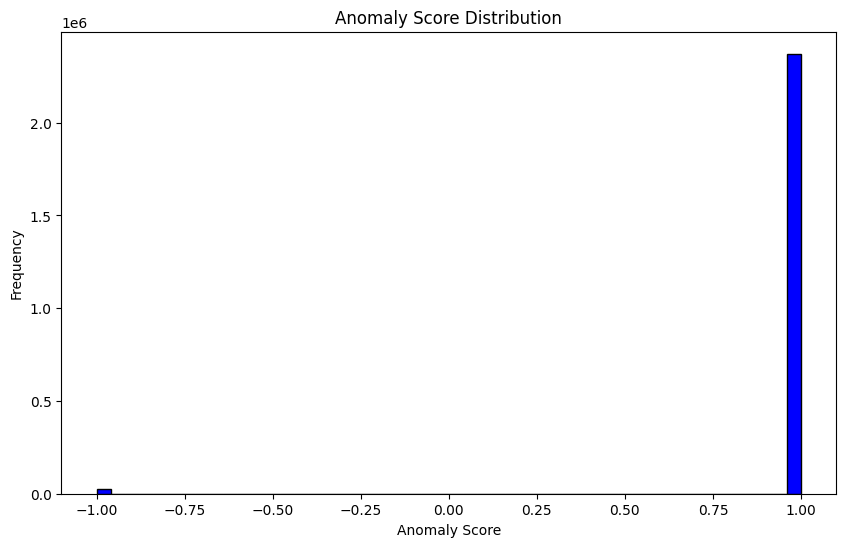

In [ ]:
# Visualize the distribution of anomaly scores
plt.figure(figsize=(10,6))
plt.hist(df['Anomaly Score'], bins=50, color='blue', edgecolor='black')
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Example: Set a custom threshold for anomalies
threshold = -0.1  # You can adjust this threshold based on the score distribution
df['Custom Anomaly'] = df['Anomaly Score'].apply(lambda x: 'Anomaly' if x < threshold else 'Normal')

# Count anomalies using the custom threshold
custom_anomalies = df[df['Custom Anomaly'] == 'Anomaly']
print(f"Number of anomalies detected using custom threshold: {len(custom_anomalies)}")


Number of anomalies detected using custom threshold: 23950


Confusion Matrix:
 [[2253178   22752]
 [ 118922    1198]]


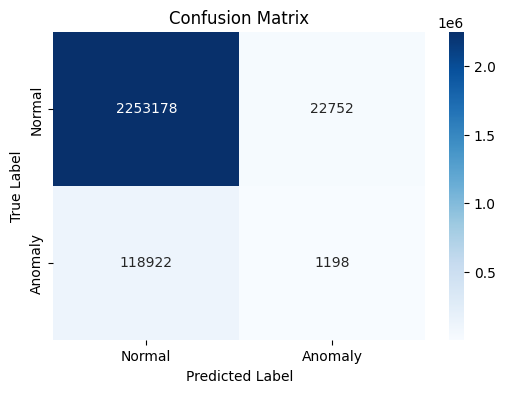


Classification Report:
               precision    recall  f1-score   support

      Normal       0.95      0.99      0.97   2275930
     Anomaly       0.05      0.01      0.02    120120

    accuracy                           0.94   2396050
   macro avg       0.50      0.50      0.49   2396050
weighted avg       0.90      0.94      0.92   2396050



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Simulating a 'True Label' column (replace this with real ground truth if available)
# Assuming 95% normal and 5% anomalies in the data for simulation purposes
df['True Label'] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])  # 0 = Normal, 1 = Anomaly

# Map 'Anomaly' column to 0 (Normal) and 1 (Anomaly)
df['Predicted Label'] = df['Anomaly'].map({'Anomaly': 1, 'Normal': 0})

# Step 1: Calculate confusion matrix
y_true = df['True Label']
y_pred = df['Predicted Label']

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Step 2: Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Step 3: Generate classification report for more details (optional)
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=['Normal', 'Anomaly']))

